<a href="https://colab.research.google.com/github/itsaryan72/Titanic-survival-prediction/blob/main/titanic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

sns.set(style='whitegrid')
%matplotlib inline



In [38]:
df = pd.read_csv('/train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
print('Shape of data:', df.shape)

Shape of data: (891, 12)


In [40]:
print('Column and data types')
df.info()

Column and data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
print('Missing values:')
print(df.isnull().sum())

Missing values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [42]:
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-42-63d4fb902a4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [44]:
df.drop('Cabin', axis=1, inplace=True)

In [46]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-46-808ebb813aa0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [48]:
df['Sex'] = df['Sex'].map({'male':0 ,'female': 1})
df['Embarked'] = df['Embarked'].map({'S':0,'C':1,'Q':2})

In [50]:
average_age_survivors = df.groupby('Survived')['Age'].mean()
print("\n Average age of survivors = (0 = did not survive, 1 = survived)")
print(average_age_survivors)


 Average age of survivors = (0 = did not survive, 1 = survived)
Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64


In [52]:
survival_percentage_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print("\n Survival percentage by class:")
print(survival_percentage_by_class)


 Survival percentage by class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [55]:
survival_percentage_by_gender = df.groupby('Sex')['Survived'].mean() * 100
print("\n Survival percentage by gender:")
print(survival_percentage_by_gender)


 Survival percentage by gender:
Sex
0    18.890815
1    74.203822
Name: Survived, dtype: float64


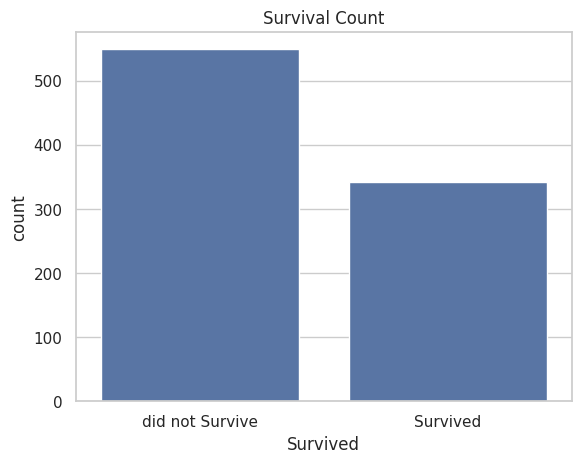

In [56]:
#Visualising survival patterns
#1.Survival Count plot
sns.countplot(x='Survived',data=df)
plt.title('Survival Count')
plt.xticks([0,1], ['did not Survive','Survived'])
plt.show()

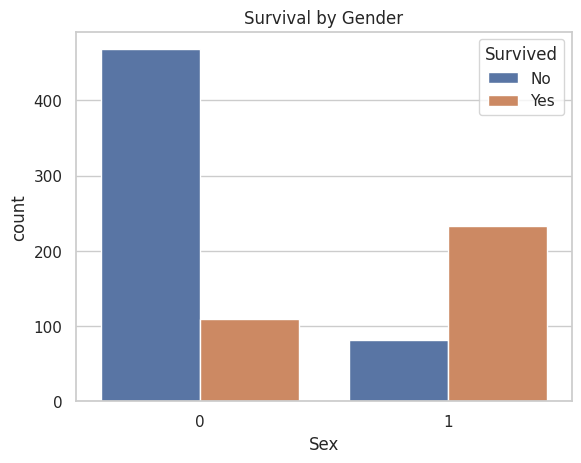

In [59]:
#2.Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.legend(title='Survived',labels=['No','Yes'])
plt.show()

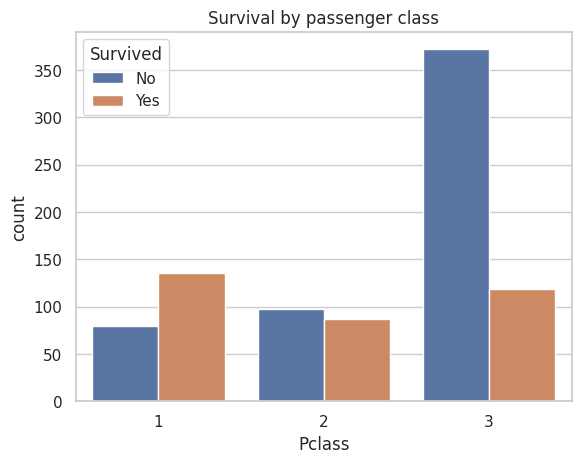

In [60]:
#3.Survival by passenger class

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by passenger class')
plt.legend(title='Survived', labels=['No','Yes'])
plt.show()

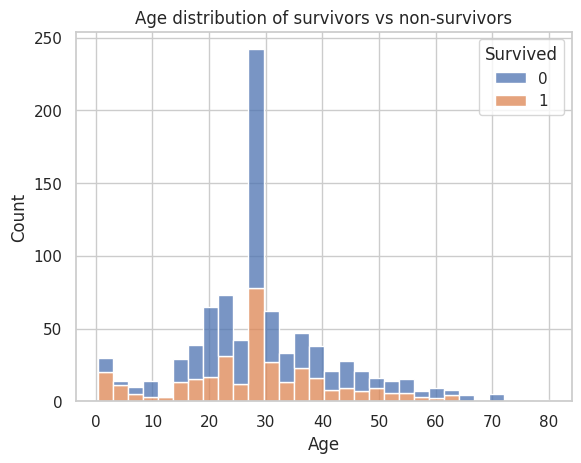

In [65]:
#4.Age distribution of survivors vs non-survivors

sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Age distribution of survivors vs non-survivors')
plt.show()

In [67]:
#Hypothesis Testing

contingency_table = pd.crosstab(df['Sex'],df['Survived'])
print(contingency_table)

Survived    0    1
Sex               
0         468  109
1          81  233


In [69]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Chi-squared statistic:', chi2)
print("p-value:", p)

Chi-squared statistic: 260.71702016732104
p-value: 1.1973570627755645e-58
